# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

#### Analyis
Observed T
1.  The best linear regressions are seen in the latitude versus max temperature for Northern Hemisphere and Southern Hemisphere. There seems to be a strong relationship between temperature and latitude.
2.  Latitude especially doesn't have a strong relationship with wind speed. The wind speed seems to be relatively steady at all latitudes.
3.  The humidity of loaction does not seem to have a correlation to either hemisphere. Both hemispheres have high humidity and the scatter plot is all over the splace. We can conclude that there is poor correlation between humidity and latitudes.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

583

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [1]:
url = "http://api.openweathermap.org/data/2.5/weather?appid="
target_url = url + weather_api_key



NameError: name 'weather_api_key' is not defined

In [2]:
units = "imperial"

query = f"{target_url}&units={units}&q="


NameError: name 'target_url' is not defined

In [5]:
#set up lists to hold the response information
country = []
cityname = []
cloudiness = []
date = []
humidity = []
max_temp = []
lat = []
lng = []
wind_speed = []
count_city = 1
set_one = 1

for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query + city).json()
        cityname.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response["wind"]["speed"])
        if count_city > 49:
            count_city = 0
            set_one = set_one + 1
    
        else:
            count_city = count_city + 1
            
        print(f"Processing Record {count_city} of Set {set_one} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")
        
        


Processing Record 1 of Set 1 : sao joao da barra
Processing Record 2 of Set 1 : tromso
Processing Record 3 of Set 1 : kyzyl
Processing Record 4 of Set 1 : butaritari
Processing Record 5 of Set 1 : baiyin
Processing Record 6 of Set 1 : abu samrah
Processing Record 7 of Set 1 : albany
Processing Record 8 of Set 1 : abalak
Processing Record 9 of Set 1 : vaini
Processing Record 10 of Set 1 : kendari
Processing Record 11 of Set 1 : cape town
Processing Record 12 of Set 1 : ilulissat
Processing Record 13 of Set 1 : chuy
Processing Record 14 of Set 1 : broken hill
Processing Record 15 of Set 1 : kedgwick
Processing Record 16 of Set 1 : sao jose da coroa grande
Processing Record 17 of Set 1 : avera
Processing Record 18 of Set 1 : iqaluit
Processing Record 19 of Set 1 : hobart
Processing Record 20 of Set 1 : atuona
Processing Record 21 of Set 1 : hermanus
Processing Record 22 of Set 1 : pevek
Processing Record 23 of Set 1 : virginia beach
Processing Record 24 of Set 1 : luanda
Processing Record

Processing Record 38 of Set 4 : beringovskiy
Processing Record 39 of Set 4 : mackay
Processing Record 40 of Set 4 : churapcha
Processing Record 41 of Set 4 : zhanaozen
Processing Record 42 of Set 4 : nhulunbuy
Processing Record 43 of Set 4 : te anau
Processing Record 44 of Set 4 : rio grande
Processing Record 45 of Set 4 : tura
Processing Record 46 of Set 4 : puro
City not found. Skipping...
Processing Record 47 of Set 4 : merauke
Processing Record 48 of Set 4 : chapais
Processing Record 49 of Set 4 : neuquen
Processing Record 50 of Set 4 : namibe
Processing Record 0 of Set 5 : atasu
Processing Record 1 of Set 5 : sao filipe
Processing Record 2 of Set 5 : kiruna
Processing Record 3 of Set 5 : vostok
Processing Record 4 of Set 5 : palu
Processing Record 5 of Set 5 : wanning
Processing Record 6 of Set 5 : bethel
Processing Record 7 of Set 5 : channel-port aux basques
Processing Record 8 of Set 5 : bengkulu
Processing Record 9 of Set 5 : comodoro rivadavia
City not found. Skipping...
Proc

Processing Record 22 of Set 8 : mae hong son
Processing Record 23 of Set 8 : lavrentiya
Processing Record 24 of Set 8 : la mesa
Processing Record 25 of Set 8 : ravar
Processing Record 26 of Set 8 : puerto concordia
Processing Record 27 of Set 8 : brokopondo
Processing Record 28 of Set 8 : rosa zarate
Processing Record 29 of Set 8 : lebu
Processing Record 30 of Set 8 : ariquemes
Processing Record 31 of Set 8 : aleksandrov gay
Processing Record 32 of Set 8 : kibondo
Processing Record 33 of Set 8 : chama
Processing Record 34 of Set 8 : santiago del estero
Processing Record 35 of Set 8 : haines junction
Processing Record 36 of Set 8 : martinsburg
Processing Record 37 of Set 8 : sisimiut
Processing Record 38 of Set 8 : kondoa
Processing Record 39 of Set 8 : bomet
Processing Record 40 of Set 8 : malazgirt
Processing Record 41 of Set 8 : carutapera
Processing Record 42 of Set 8 : ovre ardal
Processing Record 43 of Set 8 : kulhudhuffushi
Processing Record 44 of Set 8 : rawson
Processing Record

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_city_df = pd.DataFrame({ 
                "City" : cityname,
                "Lat" : lat,
                "Lng" : lng,
                "Max Temp" : max_temp,
                "Humidity" : humidity,
                "Cloudiness" : cloudiness,
                "Wind Speed" : wind_speed,
                "Country" : country,
                "Date" : date
})

In [9]:
weather_city_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,São João da Barra,-21.6403,-41.0511,78.89,84,96,13.35,BR,1650837006
1,Tromsø,69.6496,18.9570,37.42,93,75,5.75,NO,1650837007
2,Kyzyl,51.7000,94.4500,27.34,49,30,4.12,RU,1650837007
3,Butaritari,3.0707,172.7902,81.30,77,100,10.94,KI,1650836587
4,Baiyin,36.5583,104.2081,53.58,49,53,3.56,CN,1650837008
...,...,...,...,...,...,...,...,...,...
539,Aykhal,66.0000,111.5000,5.90,95,56,2.53,RU,1650836757
540,Kuril'sk,45.2333,147.8833,40.15,82,68,13.78,RU,1650837139
541,Tamworth,52.6340,-1.6959,48.52,81,24,5.99,GB,1650837139
542,Znamenskoye,57.1281,73.8282,29.16,76,65,4.12,RU,1650837139


In [13]:
#save csv output
weather_city_df.to_csv("weather_data_cities.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [14]:
weather_city_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,5.440000e+02
mean,20.434162,19.420721,59.914614,73.086397,59.022059,8.017482,1.650837e+09
std,33.989013,92.290723,20.997848,21.225482,38.394524,5.609270,1.794747e+02
min,-54.800000,-175.200000,-9.130000,1.000000,0.000000,0.000000,1.650836e+09
25%,-8.784900,-63.168025,48.002500,63.000000,20.000000,3.905000,1.650837e+09
50%,25.801650,24.880600,63.205000,78.000000,74.500000,6.500000,1.650837e+09
75%,49.975000,103.712725,77.772500,88.250000,98.000000,11.202500,1.650837e+09
max,78.218600,179.316700,95.220000,100.000000,100.000000,43.130000,1.650837e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs in the output_data folder
* Below are examples of what you should get but your results will be different.

## Latitude vs. Temperature Plot

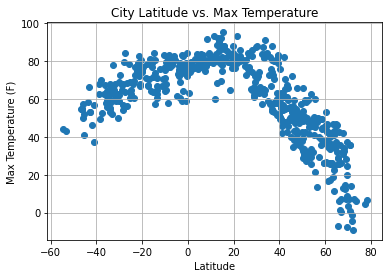

In [15]:
# Create Lat vs. Temp scatter plot
plt.scatter(weather_city_df["Lat"], weather_city_df["Max Temp"])
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

# Save plot as png
plt.savefig("lat vs temp plot.png")

## Latitude vs. Humidity Plot

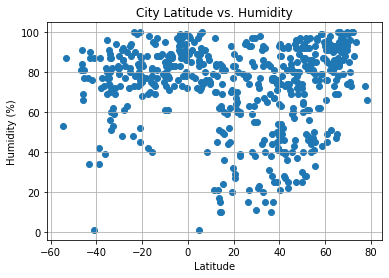

In [16]:
#Create Lat vs. Humidity Scatter Plot
plt.scatter(weather_city_df["Lat"], weather_city_df["Humidity"])
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save plot as png
plt.savefig("lat vs humidity plot.png")

## Latitude vs. Cloudiness Plot

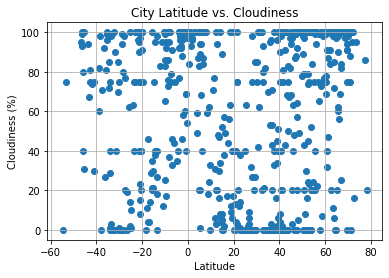

In [17]:
#Create Lat vs. Cloudiness Scatter Plot
plt.scatter(weather_city_df["Lat"], weather_city_df["Cloudiness"])
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save plot as png
plt.savefig("lat vs cloud plot.png")

## Latitude vs. Wind Speed Plot

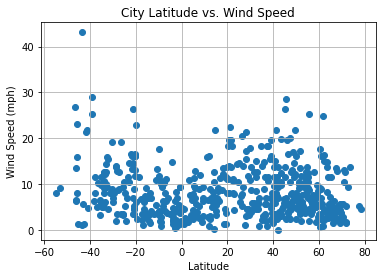

In [18]:
#Create Lat vs. Cloudiness Scatter Plot
plt.scatter(weather_city_df["Lat"], weather_city_df["Wind Speed"])
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

# Save plot as png
plt.savefig("lat vs wind plot.png")

## Linear Regression

In [19]:
#set up hemisphere using latitudes
northern_hemisphere = weather_city_df.loc[weather_city_df["Lat"] >= 0]
southern_hemisphere = weather_city_df.loc[weather_city_df["Lat"] < 0]

In [20]:
#define function for linear agression and scatterplott
def linear_agression(x,y):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    print(f"The r-squared is: {rvalue}")
    return line_eq
    

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=12,color="red")


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8671114820822922


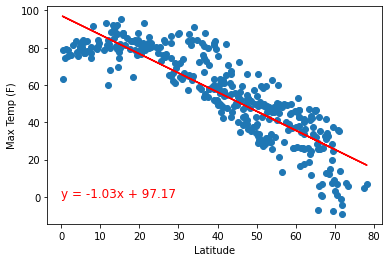

In [21]:
#call on function above
#plot linear regression 
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])
annotate(equation, 0, 0)
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

#save png file
plt.savefig("Northern Hemisphere - Max Temp vs Lat Linear Regress.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6952855427306799


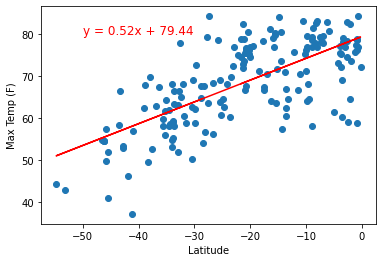

In [29]:
#call on function above
#plot linear regression 
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Max Temp"])
annotate(equation, -50, 80)
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

#save png file
plt.savefig("Southern Hemisphere - Max Temp vs Lat Linear Regress.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.22328250595756438


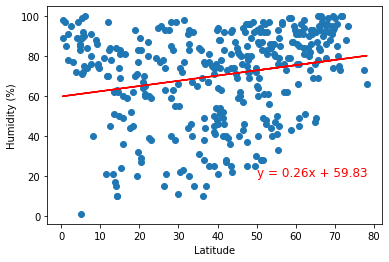

In [23]:
#call on function above
#plot linear regression 
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])
annotate(equation, 50, 20)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

#save png file
plt.savefig("Northern Hemisphere - Humidity vs Lat Linear Regress.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.34394678033330794


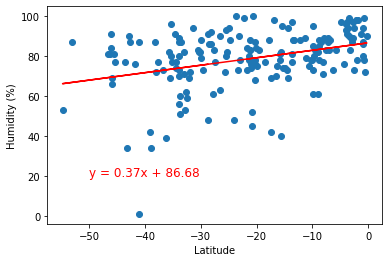

In [24]:
#call on function above
#plot linear regression 
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])
annotate(equation, -50, 20)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

#save png file
plt.savefig("Southern Hemisphere - Humidity vs Lat Linear Regress.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.2400757460304862


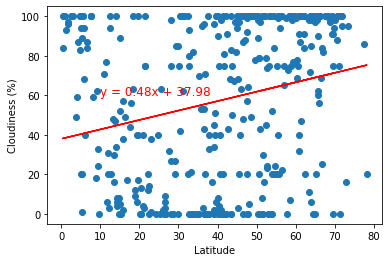

In [25]:
#call on function above
#plot linear regression 
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])
annotate(equation, 10, 60)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

#save png file
plt.savefig("Northern Hemisphere - Cloudiness vs Lat Linear Regress.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.12697830594526344


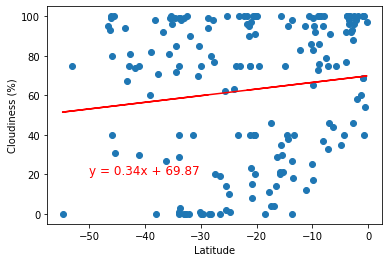

In [26]:
#call on function above
#plot linear regression 
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])
annotate(equation, -50, 20)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

#save png file
plt.savefig("Southern Hemisphere - Humidity vs Lat Linear Regress.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.058731447122117815


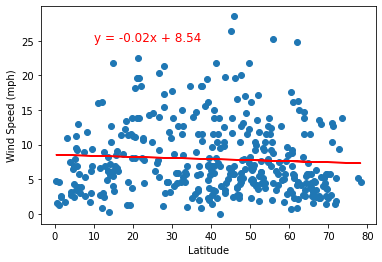

In [27]:
#call on function above
#plot linear regression 
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])
annotate(equation, 10, 25)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

#save png file
plt.savefig("Northern Hemisphere - Wind Speed vs Lat Linear Regress.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.40516362447871923


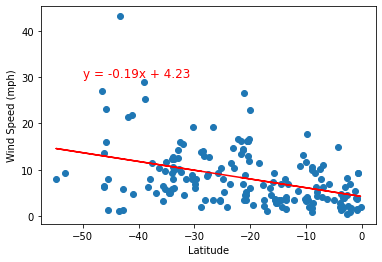

In [28]:
#call on function above
#plot linear regression 
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])
annotate(equation, -50, 30)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

#save png file
plt.savefig("Southern Hemisphere - Wind Speed vs Lat Linear Regress.png")